In [50]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats 
#import linear regression machine learning library
from sklearn.linear_model import LinearRegression

In [4]:
x= np.array([6.5,6.8,7.0,8.0,8.5,9.8,10.5,5.5,5.0])
x_bar=np.mean(x)
x_bar


7.51111111111111

In [5]:
y= np.array([180,195,210,235,280,350,400,170,160])
y_bar=np.mean(y)
y_bar

242.22222222222223

In [6]:
x_std=np.sqrt(np.sum((x-x_bar)**2)/(len(x)-1))
x_std



1.8550232103968702

In [7]:
y_std=np.sqrt(np.sum((y-y_bar)**2)/(len(y)-1))
y_std


84.48783607386595

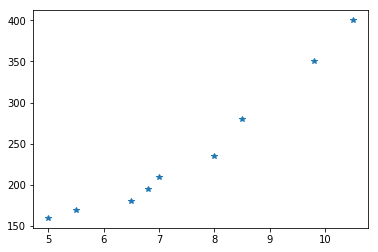

In [8]:
plt.plot(x,y,"*")

In [9]:
cv=np.sum((x-x_bar)*(y-y_bar))/(len(x)-1)
cv

152.09722222222223

In [10]:
cr=cv/(x_std*y_std) # to check the correlation coeficient between X-axis and y-axis 

In [11]:
cr

0.9704602414634144

In [12]:
np.corrcoef(x,y)

array([[1.        , 0.97046024],
       [0.97046024, 1.        ]])

In [13]:
#slope
beta1=cv/(x_std**2)
beta1

44.20003228931224

In [14]:
#Intercept
beta0=y_bar-beta1*x_bar
beta0

-89.76913141750077

In [15]:
#Model Equation (Univariate Linear Regression Model)
y_predict=beta0+beta1*x
y_predict


array([197.53107846, 210.79108815, 219.63109461, 263.8311269 ,
       285.93114304, 343.39118502, 374.33120762, 153.33104617,
       131.23103003])

In [16]:
y

array([180, 195, 210, 235, 280, 350, 400, 170, 160])

In [17]:
#Effectiveness of the model (performance matri)
SSe=np.sum((y-y_predict)**2)
SSe

3323.9384888601876

In [18]:
mse=SSe/len(x)
mse

369.3264987622431

In [19]:
#Root mean square error 
rmse=np.sqrt(mse)
rmse

19.217869256560235

In [20]:
#REGRESSION ERROR(SSR)
ssr=np.sum((y_predict-y_bar)**2)
ssr

53781.61706669537

In [21]:
#SUM SQUARE TOTAL ERROR(SST)
SST=np.sum((y-y_bar)**2)
SST

57105.55555555556

In [22]:
R_SQUARE=ssr/SST
R_SQUARE

0.9417930802612283

In [23]:
A=pd.read_csv('car_data.csv',index_col=0)
A.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [24]:
A['carb'].value_counts()

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64

In [25]:
B= A[['mpg','disp','hp','drat','wt','qsec']]

In [26]:
B.head()

,mpg,disp,hp,drat,wt,qsec
Mazda RX4,21.0,160.0,110,3.90,2.620,16.46
Mazda RX4 Wag,21.0,160.0,110,3.90,2.875,17.02
Datsun 710,22.8,108.0,93,3.85,2.320,18.61
Hornet 4 Drive,21.4,258.0,110,3.08,3.215,19.44
Hornet Sportabout,18.7,360.0,175,3.15,3.440,17.02


In [27]:
B.corr()

,mpg,disp,hp,drat,wt,qsec
mpg,1.000000,-0.847551,-0.776168,0.681172,-0.867659,0.418684
disp,-0.847551,1.000000,0.790949,-0.710214,0.887980,-0.433698
hp,-0.776168,0.790949,1.000000,-0.448759,0.658748,-0.708223
drat,0.681172,-0.710214,-0.448759,1.000000,-0.712441,0.091205
wt,-0.867659,0.887980,0.658748,-0.712441,1.000000,-0.174716
qsec,0.418684,-0.433698,-0.708223,0.091205,-0.174716,1.000000


C:\Users\AKSHAY\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


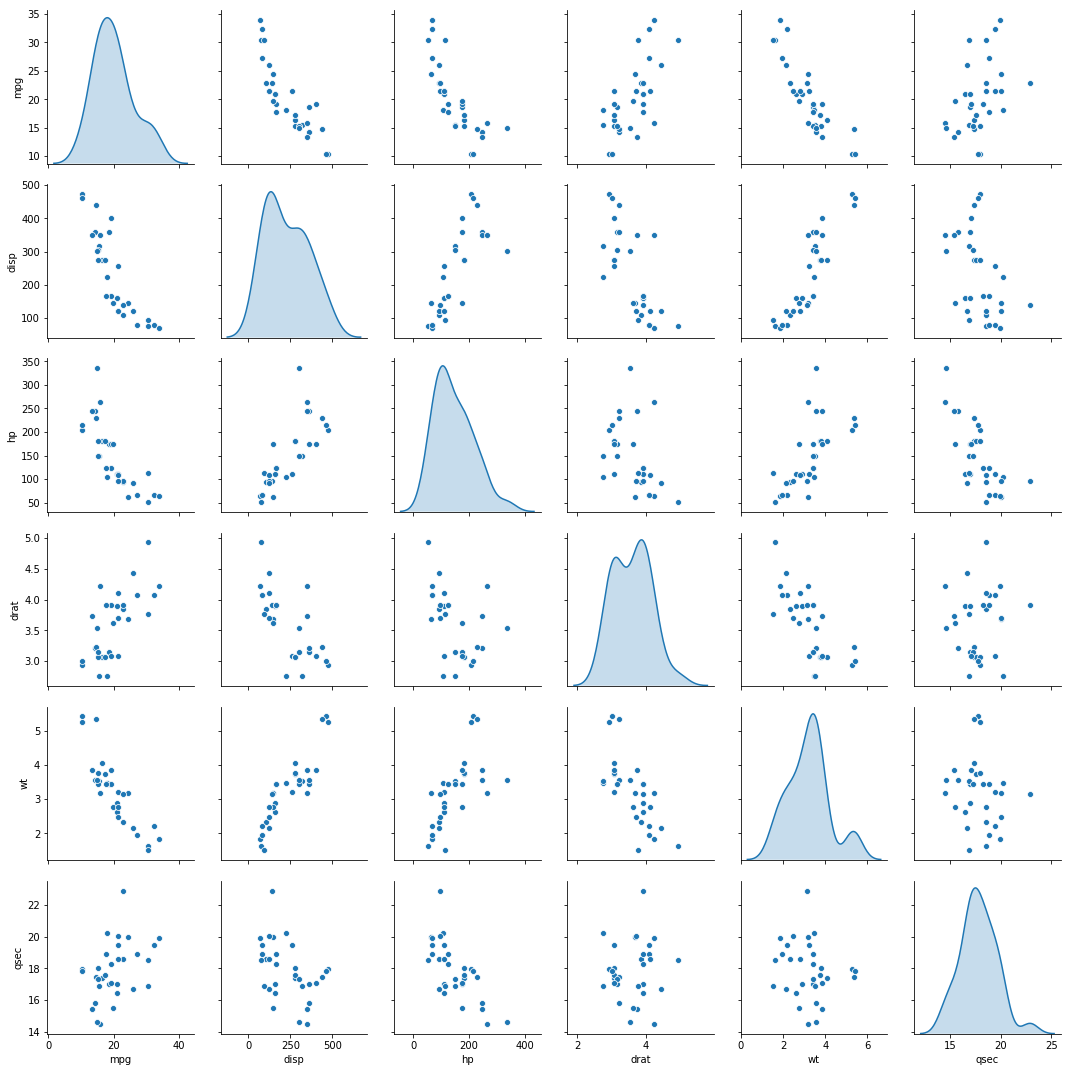

In [28]:
sns.pairplot(B,diag_kind='kde')

In [29]:
B.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900


In [51]:
x1=B[['disp']]
x2=B[['hp']]
x3=B[['wt']]
y=B[['mpg']]

In [49]:
#model 1
beta11=np.sum((x1-np.mean(x1))*(y-np.mean(y)))/np.sum((x1-np.mean(x1)**2)                                                 

SyntaxError: unexpected EOF while parsing (<ipython-input-49-b0ab50b045f6>, line 2)

In [39]:
beta01=np.mean(y)-beta11*np.mean(x1)
beta01

array([[-218.07389113,   29.9066041 ],
       [  29.9066041 ,   19.52743086]])

In [52]:
model=LinearRegression()
#building model using sklearn library
model.fit(x1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
print(model.intercept_[0],model.coef_[0])

29.59985475616395 [-0.04121512]


In [55]:
#multivariate analysis 
X=B[['disp','hp','wt']]
Y=B[['mpg']]

In [69]:
m7=LinearRegression()
m7.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
print(m7.intercept_[0],m7.coef_[0])

37.10550526903182 [-9.37009081e-04 -3.11565508e-02 -3.80089058e+00]


In [58]:
model.score(X,Y)

0.8268361424946447

In [59]:
#bivariate analysis
B1=B[['disp','hp']]
B2=B[['disp','wt']]
B3=B[['hp','wt']]

In [60]:
m4=LinearRegression()
m5=LinearRegression()
m6=LinearRegression()

In [61]:
m4.fit(B1,Y)
m5.fit(B2,Y)
m6.fit(B3,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
print(m4.intercept_[0],m4.coef_[0])

30.735904248315897 [-0.03034628 -0.02484008]


In [65]:
print(m5.intercept_[0],m5.coef_[0])

34.96055403623728 [-0.01772474 -3.35082533]


In [64]:
print(m6.intercept_[0],m6.coef_[0])

37.227270116447194 [-0.03177295 -3.87783074]


In [66]:
m4.score(B1,Y)

0.7482401820617401

In [67]:
m5.score(B2,Y)

0.7809305816592922

In [68]:
m6.score(B3,Y)

0.8267854518827914